In [25]:
import pandas as pd
import numpy as np
import scipy as cp
import matplotlib.pyplot as plt
import math
print("Set up")

Set up


In [26]:
r = 130
h = 1378
l = 1757
d = 0.73
s = math.pi * d ** 2 / 4
data = pd.read_csv("../data/ler.csv")
data

,n1,m1,n2,m2,n3,m3
0,128,0.0,NaN,0.0,121.0,0.0
1,138,246.1,141.0,246.1,132.0,245.5
2,148,245.7,153.0,245.6,144.0,245.6
3,159,246.1,165.0,245.5,156.0,246.1
4,179,245.8,176.0,245.8,169.0,245.5
5,182,245.6,189.0,247.7,179.0,245.7
6,193,245.5,199.0,245.5,190.0,245.8
7,205,245.5,210.0,245.6,221.0,245.7
8,216,245.6,223.0,246.1,212.0,246.1
9,224,245.7,235.0,245.7,NaN,NaN


In [27]:
s

0.4185386812745001

In [28]:
def dlen(n):
    return n*r/2/h

for i in range(1, 4):
    data["l{}".format(i)] = dlen(data["n{}".format(i)])
data["l1"] -= data["l1"][0]
data["l2"] -= data["l2"][1]
data["l3"] -= data["l3"][0]

for i in range(1, 4):
    for j in range(1, 10):
        data["m{}".format(i)][j] += data["m{}".format(i)][j-1]
data["m2"] -= data["m2"][1]
        
data

/tmp/ipykernel_5061/1477018908.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["m{}".format(i)][j] += data["m{}".format(i)][j-1]


,n1,m1,n2,m2,n3,m3,l1,l2,l3
0,128,0.0,NaN,-246.1,121.0,0.0,0.000000,NaN,0.000000
1,138,246.1,141.0,0.0,132.0,245.5,0.471698,0.000000,0.518868
2,148,491.8,153.0,245.6,144.0,491.1,0.943396,0.566038,1.084906
3,159,737.9,165.0,491.1,156.0,737.2,1.462264,1.132075,1.650943
4,179,983.7,176.0,736.9,169.0,982.7,2.405660,1.650943,2.264151
5,182,1229.3,189.0,984.6,179.0,1228.4,2.547170,2.264151,2.735849
6,193,1474.8,199.0,1230.1,190.0,1474.2,3.066038,2.735849,3.254717
7,205,1720.3,210.0,1475.7,221.0,1719.9,3.632075,3.254717,4.716981
8,216,1965.9,223.0,1721.8,212.0,1966.0,4.150943,3.867925,4.292453
9,224,2211.6,235.0,1967.5,NaN,NaN,4.528302,4.433962,NaN


In [29]:
del data["n2"][0]
del data["m2"][0]
del data["l2"][0]
del data["n3"][9]
del data["m3"][9]
del data["l3"][9]

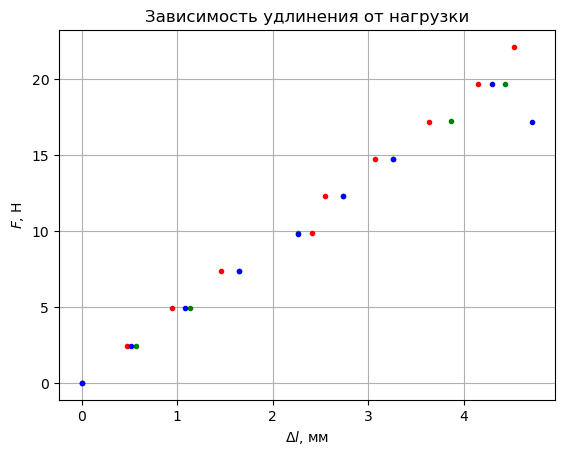

In [30]:
plt.title("Зависимость удлинения от нагрузки")
plt.xlabel("$\Delta l$, мм")
plt.ylabel("$F$, Н")
plt.grid(True)
for i in range(1, 4):
    plt.plot(data["l{}".format(i)], data["m{}".format(i)]*10/1000, "{}.".format(['r', 'g', 'b'][i-1]))
plt.savefig("../img/dirty.png", dpi=400)

In [31]:
del data["m3"][7]
del data["l3"][7]
del data["n3"][7]
#del data["m2"][0]
#del data["l3"][0]

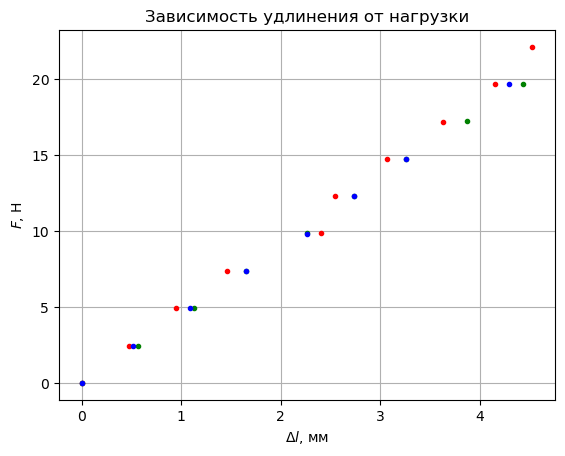

In [32]:
plt.title("Зависимость удлинения от нагрузки")
plt.xlabel("$\Delta l$, мм")
plt.ylabel("$F$, Н")
plt.grid(True)
for i in range(1, 4):
    plt.plot(data["l{}".format(i)], data["m{}".format(i)]*10/1000, "{}.".format(['r', 'g', 'b'][i-1]))

In [33]:
m = np.concatenate(tuple(data["m{}".format(i)].to_numpy() for i in range(1, 4)), axis=0) / 1000 * 10
ll = np.concatenate(tuple(data["l{}".format(i)].to_numpy() for i in range(1, 4)), axis=0)

In [34]:
k = np.mean(m * ll) / np.mean(ll**2)

In [35]:
n = len(m-3)
err = math.sqrt(1/n/(n-1)*sum([(x - k)**2 for x in m[np.where(m != 0)]/ll[np.where(ll != 0)]]))

In [36]:
print("{} +/- {}".format(k, err))

4.59688424543947 +/- 0.051193420624366166


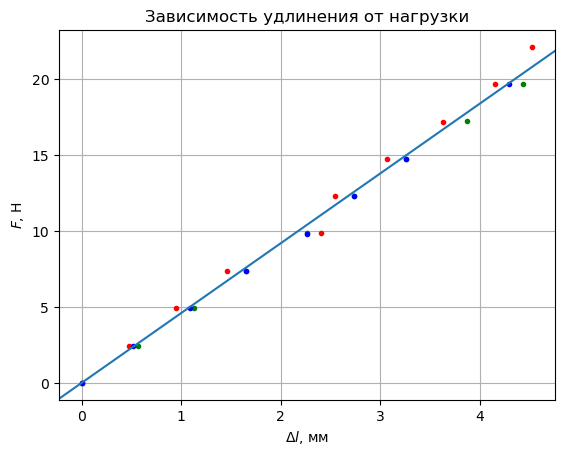

In [37]:
plt.title("Зависимость удлинения от нагрузки")
plt.xlabel("$\Delta l$, мм")
plt.ylabel("$F$, Н")
plt.grid(True)
for i in range(1, 4):
    plt.plot(data["l{}".format(i)], data["m{}".format(i)]*10/1000, "{}.".format(['r', 'g', 'b'][i-1]))
plt.axline((0, 0), (4, 4*k))
plt.savefig("../img/clean.png", dpi=400)

In [38]:
print("E = {:e} +/- {:e}".format(k * 1e3 * l * 1e-2 / (s * 1e-6), err  *1e3 * l * 1e-2 / (s * 1e-6)))

E = 1.929744e+11 +/- 2.149069e+09


In [39]:
data = pd.read_csv("../data/fuck.csv")
data

,a1,b1,a2,b2,a3,b3,a4,b4
0,20.0,9.3,21.8,10.9,21.5,4.3,21.2,4.0
1,19.8,9.4,21.6,10.9,21.3,4.2,21.4,4.0
2,19.4,9.4,21.5,11.1,21.3,4.1,21.2,3.9
3,19.6,9.2,21.5,11.0,21.4,4.1,21.1,3.9
4,19.7,9.3,21.2,10.9,21.5,4.0,21.1,3.9
5,19.7,9.3,21.5,10.7,21.5,3.9,21.0,3.8
6,19.9,9.2,21.2,10.9,21.5,3.9,21.0,3.9
7,19.7,9.3,21.4,11.2,21.6,4.0,21.0,3.9
8,19.8,9.3,21.4,11.4,21.5,3.9,21.0,3.9
9,20.2,9.3,22.0,11.1,21.5,4.0,21.4,4.0


In [40]:
ass = [[19.78, 0.16], [21.51, 0.16], [21.46, 0.11], [21.14, 0.14]]
bss = [[9.3, 0.096], [11.01, 0.15], [4.04, 0.13], [3.92, 0.09]]
for i in ["a1", "b1", "a2", "b2", "a3", "b3", "a4", "b4"]:
    exec(f"{i} = data[\"{i}\"].mean()")
    exec(f"err_{i} = math.sqrt(data[\"{i}\"].std()/math.sqrt(len(data[\"{i}\"])) ** 2 + 0.05 ** 2)")
    exec(f"print(f\"{i} = " + "{" + f"{i}" + "} +/- {" + f"err_{i}" + "}\")")

a1 = 19.78 +/- 0.1565570141906527
b1 = 9.3 +/- 0.095742710775634
a2 = 21.509999999999998 +/- 0.1649187013969519
b2 = 11.010000000000002 +/- 0.1489700439137208
a3 = 21.46 +/- 0.11027655159095684
b3 = 4.04 +/- 0.12648703947128753
a4 = 21.14 +/- 0.13518954380769335
b4 = 3.9200000000000004 +/- 0.09393910431943006


In [41]:
data = pd.read_csv("../data/blyat.csv")
data

,m,y11,y12,y21,y22,y31,y32,y41,y42
0,0.0,667,628,781,731,988,935.0,819,703
1,504.0,601,570,705,659,862,813.0,750,632
2,1001.3,537,507,634,589,740,689.0,681,562
3,1457.9,476,448,568,522,628,578.0,618,498
4,1925.5,415,386,498,463,512,460.0,554,432
5,2380.3,354,326,432,393,400,349.0,490,367
6,2884.7,288,276,358,318,278,223.0,421,296
7,3358.6,226,219,288,247,160,105.0,355,228
8,3860.0,159,153,215,170,37,NaN,285,156
9,3358.6,223,210,282,239,160,105.0,352,225


In [42]:
for i in ["y11", "y12", "y21", "y22", "y31", "y32", "y41", "y42"]:
    exec(f"data[\"d{i}\"] = data[\"{i}\"].max() - data[\"{i}\"]")
data

,m,y11,y12,y21,y22,y31,y32,y41,y42,dy11,dy12,dy21,dy22,dy31,dy32,dy41,dy42
0,0.0,667,628,781,731,988,935.0,819,703,0,0,0,0,0,0.0,0,0
1,504.0,601,570,705,659,862,813.0,750,632,66,58,76,72,126,122.0,69,71
2,1001.3,537,507,634,589,740,689.0,681,562,130,121,147,142,248,246.0,138,141
3,1457.9,476,448,568,522,628,578.0,618,498,191,180,213,209,360,357.0,201,205
4,1925.5,415,386,498,463,512,460.0,554,432,252,242,283,268,476,475.0,265,271
5,2380.3,354,326,432,393,400,349.0,490,367,313,302,349,338,588,586.0,329,336
6,2884.7,288,276,358,318,278,223.0,421,296,379,352,423,413,710,712.0,398,407
7,3358.6,226,219,288,247,160,105.0,355,228,441,409,493,484,828,830.0,464,475
8,3860.0,159,153,215,170,37,NaN,285,156,508,475,566,561,951,NaN,534,547
9,3358.6,223,210,282,239,160,105.0,352,225,444,418,499,492,828,830.0,467,478


k = 7579.559513328618 +/- 460.1368960552627
k = 8020.959089405968 +/- 491.7181526221841
k = 6726.707960444867 +/- 415.64719815480265
k = 6866.595033994898 +/- 425.3971322319575
k = 4047.562291351265 +/- 245.51658555311604
k = 4048.101269669237 +/- 261.38580861860623
k = 7209.283779972528 +/- 438.0038398902678
k = 7024.704465856174 +/- 430.3593045345461


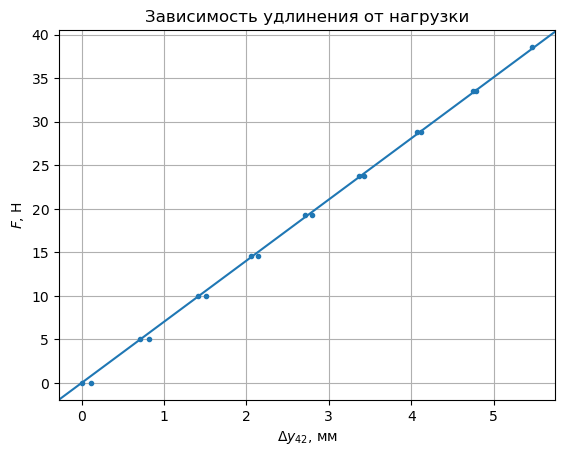

In [43]:
ks = []
for i in ["dy11", "dy12", "dy21", "dy22", "dy31", "dy32", "dy41", "dy42"]:
    f = data["m"].to_numpy() / 100
    y = data[i].to_numpy() / 100
    nan = ~np.isnan(y)
    f = f[nan]
    y = y[nan]
    k = np.mean(f * y) / np.mean(y**2)
    n = len(f)
    k_err = math.sqrt(1/n/(n-1)*sum([(x - k)**2 for x in f[np.where(y != 0)]/y[np.where(y != 0)]]))
    print(f"k = {k*1000} +/- {k_err*1000}")
    
    ks.append((k * 1e3, k_err * 1e3))
    
    plt.clf()
    plt.title("Зависимость удлинения от нагрузки")
    plt.xlabel("$\Delta y_{lol}$, мм".format(lol="{"+i[2:4]+"}"))
    plt.ylabel("$F$, Н")
    plt.grid(True)
    exec(f"plt.plot(data[\"{i}\"]/100, data[\"m\"]/100, '.')")
    plt.axline((0, 0), (3, 3*k))
    plt.savefig(f"../img/{i}.png", dpi=400)

In [44]:
l = 0.51
l_err = 0.005

def E(k, l, a, b):
    return k * l ** 3 / 4 / a / b ** 3

for i in range(4):
    ass[i][0] /= 1000
    ass[i][1] /= 1000
    bss[i][0] /= 1000
    bss[i][1] /= 1000

for i in range(8):
    e = E(ks[i][0], l, ass[i//2][0], bss[i//2][0])
    err = math.sqrt((E(ks[i][0]+ks[i][1], l, ass[i//2][0], bss[i//2][0]) - e)**2 + (E(ks[i][0], l + l_err, ass[i//2][0], bss[i//2][0]) - e)**2 + (E(ks[i][0], l, ass[i//2][0] + ass[i//2][1], bss[i//2][0]) - e)**2 + (E(ks[i][0], l, ass[i//2][0], bss[i//2][0] + bss[i//2][1]) - e)**2)
    print("E{} = {:e} +/- {:e}".format(i, e, err))
    

E0 = 1.579863e+10 +/- 1.177228e+09
E1 = 1.671867e+10 +/- 1.253923e+09
E2 = 7.770532e+09 +/- 6.185965e+08
E3 = 7.932126e+09 +/- 6.324531e+08
E4 = 9.485719e+10 +/- 1.073317e+10
E5 = 9.486982e+10 +/- 1.093805e+10
E6 = 1.877498e+11 +/- 1.776245e+10
E7 = 1.829428e+11 +/- 1.736753e+10


In [45]:
l = 0.51
for i in ["dy11", "dy12", "dy21", "dy22", "dy31", "dy32", "dy41", "dy42"]:
    exec(f"E_{i}={i}*")
    exec(f"print(f\"{i} = " + "{" + f"{i}" + "} +/- {" + f"err_{i}" + "}\")")

SyntaxError: invalid syntax (<string>, line 1)